Testing ideas on Clutter and DoD

In [66]:
import pyart
import os
import numpy as np
from matplotlib import pyplot as plt
import netCDF4 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [82]:
filename = '/data/radar/oli_kazr/olikazrgeM1.a1.20160620.000001.nc'
radar = pyart.io.read(filename)
tsi_filename = '/data/radar/oli_kazr/olitsiskycoverM1.b1.20160620.000000.cdf'
tsi_dataset = netCDF4.Dataset(tsi_filename)
ceil_filename = '/data/radar/oli_kazr/oliceilM1.b1.20160620.000008.nc'
ceil_dataset = netCDF4.Dataset(ceil_filename)


In [83]:
ceil_dtimes = netCDF4.num2date(ceil_dataset.variables['time'][:], 
                               ceil_dataset.variables['time'].units)
tsi_dtimes = netCDF4.num2date(tsi_dataset.variables['time'][:], 
                               tsi_dataset.variables['time'].units)


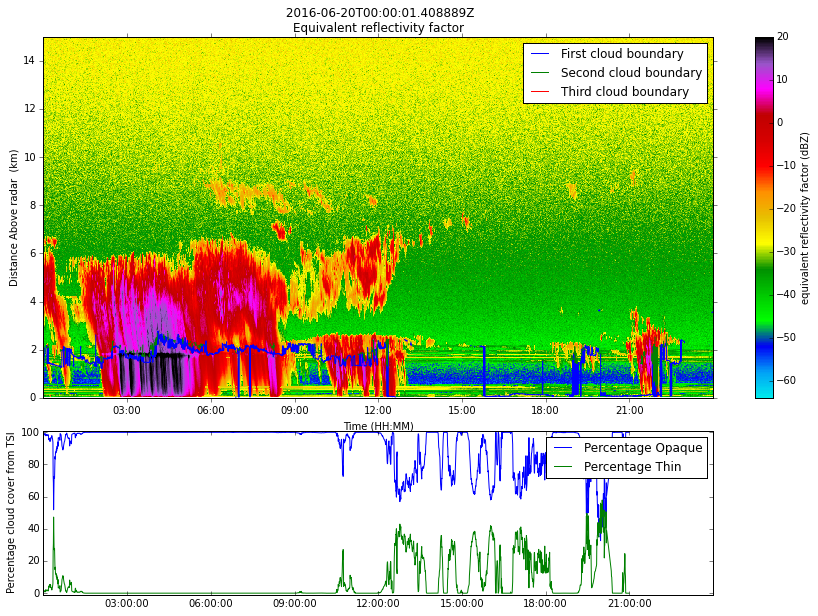

In [85]:
my_display = pyart.graph.RadarDisplay(radar)
my_fig = plt.figure(figsize = [15,10])
ax1 = plt.subplot2grid((3,1), (0,0), rowspan = 2)
ax2 = plt.subplot2grid((3,1), (2,0))

my_display.plot_vpt('reflectivity', vmin=-64, 
                    vmax=20, time_axis_flag=True,
                   ax = ax1)

ax1.plot(ceil_dtimes, 
        ceil_dataset.variables['first_cbh'][:]/1000.0,
        label='First cloud boundary')
ax1.plot(ceil_dtimes,
        ceil_dataset.variables['second_cbh'][:]/1000.0,
        label='Second cloud boundary')
ax1.plot(ceil_dtimes,
        ceil_dataset.variables['third_cbh'][:]/1000.0,
        label='Third cloud boundary')
ax1.set_ylim([0,15])
ax1.set_xlim([ceil_dtimes.min(), ceil_dtimes.max()])

ax2.plot(tsi_dtimes, 
         tsi_dataset.variables['percent_opaque'][:],
         label='Percentage Opaque' )
ax2.plot(tsi_dtimes, 
         tsi_dataset.variables['percent_thin'][:],
         label='Percentage Thin')


pos1 = ax1.get_position() # get the original position 
pos2 = ax2.get_position()
pos3 = [pos2.x0 , pos2.y0 ,  pos1.width , pos2.height ] 
ax2.set_position(pos3) # set a new position
ax2.set_ylim([-1,101])
ax2.set_xlim([ceil_dtimes.min(), ceil_dtimes.max()])
ax2.set_ylabel('Percentage cloud cover from TSI')
ax2.legend()
ax1.legend()


In [77]:
ax2.legend?